In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mal_cfr_data.plot as mcd_plt

mcd_plt.set_plt_params()

sns.set_style("whitegrid")
colors = sns.color_palette('colorblind')
sns.set_palette(colors)

In [2]:
data = pd.DataFrame.from_records(np.load('results/cor_gap_data.npy', allow_pickle=True))
data

,game_tag,param,training_regime,num_iterations,afcce_gap,afce_gap,efcce_gap,efce_gap,value_1,value_2
0,eshapley,big,alt,1,0.125000,0.125000,0.125000,0.125000,12.792,0.417
1,eshapley,big,alt,2,0.250000,0.250000,0.250000,0.250000,18.694,0.444
2,eshapley,big,alt,3,0.187500,0.203125,0.187500,0.203125,16.443,0.505
3,eshapley,big,alt,4,0.150000,0.337500,0.150000,0.337500,13.154,0.604
4,eshapley,big,alt,5,0.195076,0.330492,0.195076,0.330492,11.038,0.594
...,...,...,...,...,...,...,...,...,...,...
403951,eshapley,medium,alt,9999500,0.022276,0.291935,0.022276,0.314211,0.676,0.411
403952,eshapley,medium,alt,9999600,0.022276,0.291942,0.022276,0.314218,0.676,0.411
403953,eshapley,medium,alt,9999700,0.022276,0.291949,0.022276,0.314225,0.676,0.411
403954,eshapley,medium,alt,9999800,0.022276,0.291956,0.022276,0.314232,0.676,0.411


/Users/morrill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/morrill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


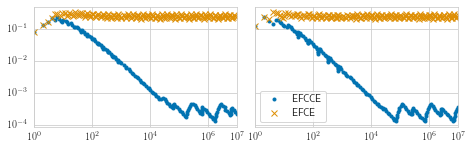

In [11]:
gr = 1.618

kwargs = {
    'markevery': 0.01,
    'ls': ''
}

_, axes = plt.subplots(1, 2, figsize=(4*gr, 2), sharex=True, sharey=True)
for ax in axes:
    ax.set_xlim((1, 1e7))
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xticks((1, 1e2, 1e4, 1e6, 1e7))

df = data.query('game_tag == "eshapley" and param == "small" and training_regime == "sim"')
x = df.num_iterations.to_numpy()
axes[0].plot(
    x,
    df.efcce_gap,
    marker='.',
    **kwargs
)
axes[0].plot(
    x,
    df.efce_gap,
    marker='x',
    **kwargs
)

df = data.query('game_tag == "eshapley" and param == "small" and training_regime == "alt"')
x = df.num_iterations.to_numpy()
axes[1].plot(
    x,
    df.efcce_gap,
    marker='.',
    **kwargs
)
axes[1].plot(
    x,
    df.efce_gap,
    marker='x',
    **kwargs
)
plt.legend(['EFCCE', 'EFCE'])
plt.tight_layout(0.4)
plt.savefig('results/cor_gap.eshapley.small.pdf')


In [4]:
(data.efcce_gap - data.afcce_gap).abs().sum()

1.1377785232000002

/Users/morrill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/morrill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


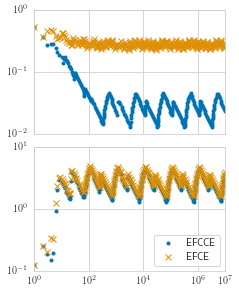

In [12]:
_, axes = plt.subplots(2, 1, figsize=(2*gr, 4), sharex=True, sharey=False)

df = data.query('game_tag == "eshapley" and param == "medium" and training_regime == "alt"')
x = df.num_iterations.to_numpy()
axes[0].plot(
    x,
    df.efcce_gap,
    marker='.',
    **kwargs
)
axes[0].plot(
    x,
    df.efce_gap,
    marker='x',
    **kwargs
)

df = data.query('game_tag == "eshapley" and param == "big" and training_regime == "alt"')
x = df.num_iterations.to_numpy()
axes[1].plot(
    x,
    df.efcce_gap,
    marker='.',
    **kwargs
)
axes[1].plot(
    x,
    df.efce_gap,
    marker='x',
    **kwargs
)

axes[0].set_ylim((1e-2, 1e0))
axes[1].set_ylim((1e-1, 1e1))
for ax in axes:
    ax.set_xlim((1, 1e7))
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xticks((1, 1e2, 1e4, 1e6, 1e7))
    

plt.legend(['EFCCE', 'EFCE'])
plt.tight_layout(0.4)
plt.savefig('results/cor_gap.eshapley.medium-big.alt.pdf')